In [1]:
import numpy as np #numerical analysis/linear algebra analysis
import pandas as pd #Data analysis
import matplotlib.pyplot as plt #Data visualisation

In [2]:
Htrain = pd.read_csv("housing_train.csv")

In [3]:
Htrain.head() #Preview of the dataset 
#Data is scaled or Normalized.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.267645,-1.367976,0.346478,0.224718,0.214986,0.772251,0.322924,-0.321654,103000.0
1,0.703627,-0.871699,1.617807,0.342065,0.596500,-0.098440,0.670799,-0.030620,382100.0
2,-0.454356,-0.455012,-1.957806,-0.338639,-0.490815,-0.450778,-0.427755,0.150349,172600.0
3,1.227714,-1.377340,0.584852,-0.556832,-0.404974,-0.006602,-0.378059,-1.014947,93400.0
4,-0.114948,0.537543,1.141059,-0.116322,-0.252369,-0.486983,-0.312669,-0.166583,96500.0


In [4]:
Htrain.shape #Dimension of the dataset (nrows, ncolumn)

(16512, 9)

In [5]:
Htrain.isnull().sum() #number of nulss present in the databset

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [6]:
Htrain.describe() #Sumarry Statistics (is only valid fo rthe numerical data)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-0.006282,0.005285,-0.002479,0.002861,0.003953,0.000862,0.001170,0.005308,207194.693738
std,1.001083,1.000358,1.001370,0.996830,0.999107,1.004081,0.996462,1.002378,115622.626448
min,-2.385992,-1.442886,-2.196180,-1.207283,-1.277688,-1.256123,-1.303984,-1.774299,14999.000000
25%,-1.118200,-0.796789,-0.845393,-0.541705,-0.572483,-0.562043,-0.574229,-0.686382,119800.000000
50%,0.528931,-0.642287,0.028646,-0.232294,-0.238062,-0.228249,-0.234201,-0.171005,179850.000000
75%,0.778496,0.977638,0.664310,0.240303,0.262675,0.265378,0.278458,0.475058,265125.000000
max,2.625280,2.958068,1.856182,16.815580,14.087789,30.250330,14.601520,5.858286,500001.000000


### Simple Linear Regression

Draw a scatter plot between median_income and median_house_value variables. What type of correlation exists between the variables? 


Text(0.5, 1.0, 'Correlation between median_income and median_house_value')

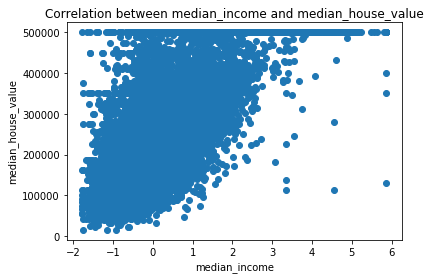

In [7]:
plt.figure()
plt.scatter(Htrain[['median_income']],Htrain[['median_house_value']])
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.title('Correlation between median_income and median_house_value')
#Strong correlation

In [8]:
Htrain['median_income'].corr(Htrain['median_house_value']) ##Determine the correlation

#Weak Correlation - 0.0 - 0.4
#Moderate Correlation - 0.4 - 0.7
#Postive Correlation - 0.7 - 1

0.6906466061467708

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
lin_reg = LinearRegression() #Creating an instance of Linear Regression

In [11]:
lin_reg.fit(Htrain[['median_income']],Htrain['median_house_value']) #Train our LR model on the Train Set  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
lin_reg.coef_ #Coeficient/Slope/m

array([79664.90785833])

In [13]:
lin_reg.intercept_ #Y-intercept/c/Beta0

206771.86405797795

In [14]:
lin_reg.score(Htrain[['median_income']],Htrain['median_house_value']) #R-Square value of the prediction

0.47699273458205255

In [15]:
0.6906466061467708 ** 2

0.4769927345820527

In [16]:
y_pred_Train = lin_reg.predict(Htrain[['median_income']]) #Predict values on the Train Set

In [17]:
y_pred_Train[:6] # The first 6 Predicted values / y-cap

array([181147.30465315, 204332.52998299, 218749.38740458, 125916.23161656,
       193501.01668457, 322175.03354948])

In [18]:
lin_rmse = np.sqrt(mean_squared_error(Htrain['median_house_value'],y_pred_Train))
lin_rmse #Root - Mean squared Error

83614.87409655548

Text(0.5, 1.0, 'Linear Regression on median_income ~ median_house_value')

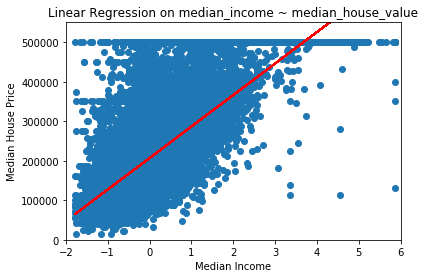

In [19]:
plt.scatter(Htrain[['median_income']],Htrain['median_house_value'])
plt.plot(Htrain[['median_income']],y_pred_Train,'r')
plt.axis([-2,6,0,550000]) #range on x-axis and y-axis
plt.xlabel('Median Income')
plt.ylabel('Median House Price')
plt.title('Linear Regression on median_income ~ median_house_value')

## Gradient Descent Regression

In [20]:
from sklearn.linear_model import SGDRegressor

In [21]:
gdreg = SGDRegressor() # Creating an instance of the Scohastic Gradient Descent Regressor

In [22]:
gdreg.fit(Htrain[['median_income']],Htrain['median_house_value']) #Train our SGDR model on the Train Set

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [23]:
gdreg.intercept_ #Beta0/c

array([206236.27957028])

In [24]:
gdreg.coef_ #Slope/m

array([78660.39079015])

In [25]:
gdreg.score(Htrain[['median_income']],Htrain['median_house_value']) #R-Square of the model

0.47689500792222317

In [26]:
y_Pred_gd = gdreg.predict(Htrain[['median_income']])  #Predicting the value of Train set

Text(0.5, 1.0, 'Best Fit Line using Gradient Descent Method')

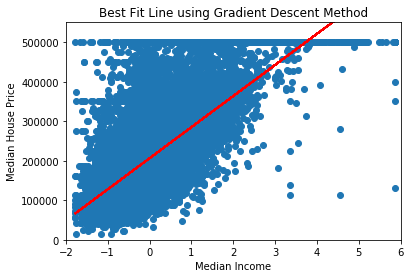

In [27]:
plt.scatter(Htrain[['median_income']],Htrain['median_house_value'])
plt.plot(Htrain[['median_income']],y_Pred_gd,'r')
plt.axis([-2,6,0,550000]) #range on x-axis and y-axis
plt.xlabel('Median Income')
plt.ylabel('Median House Price')
plt.title('Best Fit Line using Gradient Descent Method')

### Multiple Linear Regression

In [28]:
model_all = LinearRegression() #Creating an instance

In [29]:
#Dropping the target variable from the dataframe to create a feature matrix // axis = 1 is for along the column.
X_Train = Htrain.drop('median_house_value',axis=1)
X_Train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,1.267645,-1.367976,0.346478,0.224718,0.214986,0.772251,0.322924,-0.321654
1,0.703627,-0.871699,1.617807,0.342065,0.596500,-0.098440,0.670799,-0.030620
2,-0.454356,-0.455012,-1.957806,-0.338639,-0.490815,-0.450778,-0.427755,0.150349
3,1.227714,-1.377340,0.584852,-0.556832,-0.404974,-0.006602,-0.378059,-1.014947
4,-0.114948,0.537543,1.141059,-0.116322,-0.252369,-0.486983,-0.312669,-0.166583


In [30]:
#Making a dependent variable array 
Y_Train = Htrain['median_house_value']
Y_Train.head()

0    103000.0
1    382100.0
2    172600.0
3     93400.0
4     96500.0
Name: median_house_value, dtype: float64

In [31]:
#Training the MLR model on the traning set
model_all.fit(X_Train,Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
model_all.coef_ #Slopes/m

array([-85413.28005747, -90669.13624699,  14885.95835764, -17862.58294108,
        48757.37209674, -43589.91735845,  17717.71485854,  77013.87535191])

In [33]:
model_all.intercept_ #Beta0/c

206640.6370318638

In [34]:
#Evalutae the R-square for the model
model_all.score(X_Train,Y_Train)

0.6400947924305294

In [35]:
y_pred_MLR = model_all.predict(X_Train) #Predict on the training set 

In [36]:
rmse = np.sqrt(mean_squared_error(Y_Train,y_pred_MLR)) #Evluation matrix

In [37]:
rmse

69362.34135238081

### Feature Selection - Adding One by One all the features to understand Multiple Linear Regression.

In [38]:
Htrain.corr() #Correlation Table

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924485,-0.101818,0.038676,0.063064,0.094276,0.049306,-0.017040,-0.046349
latitude,-0.924485,1.000000,0.005296,-0.029224,-0.059998,-0.102499,-0.064061,-0.076571,-0.142983
housing_median_age,-0.101818,0.005296,1.000000,-0.360922,-0.320624,-0.292283,-0.302796,-0.121711,0.103706
total_rooms,0.038676,-0.029224,-0.360922,1.000000,0.930489,0.857936,0.920482,0.198268,0.133989
total_bedrooms,0.063064,-0.059998,-0.320624,0.930489,1.000000,0.878932,0.980255,-0.009141,0.047980
population,0.094276,-0.102499,-0.292283,0.857936,0.878932,1.000000,0.907452,0.004122,-0.026032
households,0.049306,-0.064061,-0.302796,0.920482,0.980255,0.907452,1.000000,0.012776,0.063714
median_income,-0.017040,-0.076571,-0.121711,0.198268,-0.009141,0.004122,0.012776,1.000000,0.690647
median_house_value,-0.046349,-0.142983,0.103706,0.133989,0.047980,-0.026032,0.063714,0.690647,1.000000


## Model with 'longitude' variable

In [39]:
model1 = LinearRegression()

In [40]:
model1.fit(X_Train[['longitude']],Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
model1.coef_

array([-5353.18054039])

In [42]:
model1.intercept_

207161.06474598034

In [43]:
model1.score(X_Train[['longitude']],Y_Train)

0.0021482189561506937

## Model with 'longitude' & 'latitude' variables

In [44]:
model2 = LinearRegression()

In [45]:
model2.fit(X_Train[['longitude','latitude']],Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
model2.coef_

array([-141889.12431787, -147795.69758896])

In [47]:
model2.intercept_

207084.4075166661

In [48]:
model2.score(X_Train[['longitude','latitude']],Y_Train)

0.23977500440286748

## Model with 'longitude','latitude' & 'housing_median_age' variables

In [49]:
model3 = LinearRegression()

In [50]:
model3.fit(X_Train[['longitude','latitude','housing_median_age']],Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
model3.coef_

array([-143091.95032316, -148898.94074323,   -1803.0265797 ])

In [52]:
model3.intercept_

207078.21161327386

In [53]:
model3.score(X_Train[['longitude','latitude','housing_median_age']],Y_Train)

0.24000307748194905

## Model with 'longitude','latitude','housing_median_age' & 'total_rooms' variables

In [54]:
model1.fit(X_Train[['longitude','latitude','housing_median_age','total_rooms']],Y_Train)
print("Coefficients : ",model1.coef_)
print("Intercept : ", model1.intercept_)
model1.score(X_Train[['longitude','latitude','housing_median_age','total_rooms']],Y_Train)

Coefficients :  [-139918.19489232 -145458.44039198    5180.33149439   18588.32272379]
Intercept :  207044.09690195063


0.26221824117424786

## Model with 'longitude','latitude','housing_median_age', 'total_rooms' & 'total_bedrooms' variables

In [55]:
model1.fit(X_Train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms']],Y_Train)
print("Coefficients : ",model1.coef_)
print("Intercept : ", model1.intercept_)
model1.score(X_Train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms']],Y_Train)

Coefficients :  [-140821.79695263 -148740.880461      6374.50953443   88723.50645406
  -74804.09155293]
Intercept :  207153.79553383638


0.31771834380202746

## Model with 'longitude','latitude','housing_median_age','total_rooms','total_bedrooms' & 'population' variables

In [56]:
model1.fit(X_Train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population']],Y_Train)
print("Coefficients : ",model1.coef_)
print("Intercept : ", model1.intercept_)
model1.score(X_Train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population']],Y_Train)

Coefficients :  [-144389.62331851 -155699.63277662    6583.01551464  108502.58659167
  -38029.63257305  -62562.8816911 ]
Intercept :  207020.6342050893


0.3801845000742566

## Model with 'longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population' & 'households' variables

In [57]:
model1.fit(X_Train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households']],Y_Train)
print("Coefficients : ",model1.coef_)
print("Intercept : ", model1.intercept_)
model1.score(X_Train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households']],Y_Train)

Coefficients :  [-139798.10182907 -151645.85741153    6391.26182068  108158.05257741
  -72441.0594132   -71027.870383     43062.25888446]
Intercept :  207121.53176075255


0.3840491803301826

## Model with 'longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households' & 'median_income' variables

In [58]:
model1.fit(X_Train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']],Y_Train)
print("Coefficients : ",model1.coef_)
print("Intercept : ", model1.intercept_)
model1.score(X_Train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']],Y_Train)

Coefficients :  [-85413.28005747 -90669.13624699  14885.95835764 -17862.58294108
  48757.37209674 -43589.91735845  17717.71485854  77013.87535191]
Intercept :  206640.6370318638


0.6400947924305294

## Select K best method for Feature Selection.

In [60]:
from sklearn.feature_selection import f_regression, SelectKBest

In [62]:
select_feature = SelectKBest(f_regression,k=6).fit(X_Train,Y_Train) ##Selecting best 6 features on the basis of the f_regression score

In [65]:
select_feature.scores_ ##Score for each variable

array([3.55434501e+01, 3.44579030e+02, 1.79495552e+02, 3.01823325e+02,
       3.80956840e+01, 1.11961694e+01, 6.72961323e+01, 1.50574391e+04])

In [64]:
select_feature.pvalues_ ##p values for the features

array([2.54505126e-09, 3.82179753e-76, 1.01919784e-40, 5.20398942e-67,
       6.89318215e-10, 8.21491618e-04, 2.50682998e-16, 0.00000000e+00])

In [67]:
selected_feature_df = pd.DataFrame({'Feature':list(X_Train.columns),
                                   'P_values':select_feature.pvalues_})
selected_feature_df.sort_values(by='P_values',ascending=True)

,Feature,P_values
7,median_income,0.000000e+00
1,latitude,3.821798e-76
3,total_rooms,5.203989e-67
2,housing_median_age,1.019198e-40
6,households,2.506830e-16
4,total_bedrooms,6.893182e-10
0,longitude,2.545051e-09
5,population,8.214916e-04


In [69]:
X_train_new = select_feature.transform(X_Train)
X_train_new.shape

(16512, 6)

In [71]:
model_Kbest = model_all.fit(X_train_new,Y_Train)

In [72]:
y_pred = model_Kbest.predict(X_train_new)

In [73]:
lin_rmse_kBest = np.sqrt(mean_squared_error(Y_Train,y_pred))

In [75]:
lin_rmse_kBest

77212.93113565829

## Reurrsive Feature Elimination

In [77]:
from sklearn.feature_selection import RFE ##Recurssive Feature Selection

In [78]:
rfe = RFE(estimator=model_all,step=1) #step=1 means elimination one feature at each iteration

In [79]:
rfe.fit(X_Train,Y_Train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=None, step=1, verbose=0)

In [80]:
selected_feature_rfe_df= pd.DataFrame({'Feature':list(X_Train.columns),
                                      'Ranking':rfe.ranking_})
selected_feature_rfe_df.sort_values(by='Ranking')

,Feature,Ranking
0,longitude,1
1,latitude,1
4,total_bedrooms,1
7,median_income,1
5,population,2
3,total_rooms,3
6,households,4
2,housing_median_age,5


In [82]:
X_train_rfe = rfe.transform(X_Train)
X_train_rfe.shape

(16512, 4)

In [83]:
model_rfe = model_all.fit(X_train_rfe,Y_Train)

In [84]:
model_rfe.coef_

array([ -99769.10837052, -103067.90916562,    6308.59029907,
         70148.4231635 ])

In [85]:
model_rfe.intercept_

206715.37035221973

In [90]:
model_rfe.score(X_train_rfe,Y_Train)

0.5901689024984468

In [91]:
y_pred_rfe = model_rfe.predict(X_train_rfe)

In [93]:
lin_rfe_rmse = np.sqrt(mean_squared_error(Y_Train,y_pred_rfe))
lin_rfe_rmse

74017.11164682292

## Testing Set

In [86]:
HTest = pd.read_csv("housing_test.csv")

In [87]:

X_test = HTest.drop('median_house_value', axis = 1)
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.279366,0.200449,-0.289187,-0.518327,-0.242831,-0.029562,-0.367597,-1.152489
1,0.054757,-0.230283,0.108104,0.140833,-0.242831,0.123206,0.220915,-0.705015
2,-1.432653,1.015093,1.856182,0.547423,-0.242831,-0.101972,1.212230,-0.205588
3,0.424114,-0.632923,-0.924851,0.190339,-0.242831,0.246834,-0.011874,0.982710
4,-1.178096,0.462633,0.425936,-0.130532,-0.242831,-0.320086,-0.187120,-0.076678


In [89]:
y_test = HTest['median_house_value']
y_test.head()

0     47700.0
1     45800.0
2    500001.0
3    218600.0
4    278000.0
Name: median_house_value, dtype: float64

In [94]:
model_all = LinearRegression()

In [95]:
model_all.fit(X_Train,Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [100]:
y_pred_test = model_all.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
SSE = np.sum((y_pred_test-y_test)**2)
SST = np.sum(y_test-np.mean(Y_Train)**2)
r2_test = 1-(SSE/SST)

print("Test RMSE : ", rmse_test)
print("Test SSE : ", SSE)
print("Test SST : ", SST)
print("Test R2 : ", r2_test)

Test RMSE :  71133.17349286025
Test SSE :  20887384316170.594
Test SST :  -177212710209751.7
Test R2 :  1.1178661750133383


In [99]:
y_pred_test = model_all.predict(X_test) #Predicting values for the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test)) #Evaluating RMSE value for test set predictions
SSE = np.sum((y_pred_test-y_test)**2) #Residual Sum of Squares
SST = np.sum((y_test-np.mean(Y_Train))**2) #Total Sum of Squares
r2_test = 1 - SSE/SST #Evaluating R square for test set using SSE and SST values

print("Test RMSE : ", rmse_test)
print("Test SSE : ", SSE)
print("Test SST : ", SST)
print("Test R2 : ", r2_test)

Test RMSE :  71133.17349286025
Test SSE :  20887384316170.594
Test SST :  54105533852322.5
Test R2 :  0.6139510540052828
